In [194]:
import pandas as pd

In [195]:
with open("C:/Users/Ольга/patient_model.txt", encoding='utf-8') as f:
    patients_m = f.read()
    patients_m = patients_m.split(sep=',')

In [196]:
with open("C:/Users/Ольга/control_model.txt", encoding='utf-8') as f:
    control_m = f.read()
    control_m = control_m.split(sep=',')

In [197]:
def calculate_1(file):
    percent_good = []
    percent_bad = []
    for elem in file:
        if elem in good:
            percent_good.append(elem)
        elif elem in bad:
            percent_bad.append(elem)

    per_cent_good = len(percent_good) / len(file) * 100
    per_cent_bad = len(percent_bad) / len(file) * 100
    return round(per_cent_good, 2), round(per_cent_bad, 2)

In [198]:
pos_patients = []
neg_patients = []
for elem in patients_m:
    a, b = calculate_1(elem.split(sep=' '))
    pos_patients.append(a)
    neg_patients.append(b)

In [199]:
pos_conrol = []
neg_conrol = []
for elem in control_m:
    a, b = calculate_1(elem.split(sep=' '))
    pos_conrol.append(a)
    neg_conrol.append(b)

# DATA

In [200]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [204]:
data = pd.read_csv("C:/Users/Ольга/Desktop/contol_group  - errors.csv")

data['positive voc'] = pos_patients + pos_conrol
data['negative voc'] = neg_patients + neg_conrol

data = data.drop(['ID', 'group', 'diagnosis'], axis=1)

data = pd.get_dummies(data, drop_first=True)
data.head()

data.head()

,group1,age,years of education,errors,...=,...*,positive voc,negative voc,sex_male,education_higher.unfinished,education_secondary,education_vocational,education_vocational.unfinished,education_ученая степень
0,0,36,17,0,0,0,3.03,0.0,0,0,0,0,0,0
1,0,27,18,0,0,0,0.00,0.0,0,0,0,0,0,0
2,0,20,14,0,0,0,0.00,0.0,1,0,0,0,0,0
3,0,21,14,1,0,1,9.09,0.0,0,0,0,0,0,0
4,0,25,18,0,0,0,0.00,0.0,1,0,0,0,0,0


In [205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [206]:
normalizer = StandardScaler()
normalizer.fit(data[['age', 'years of education', 'errors', '...=', 'positive voc', 'negative voc']])
X_transformed = normalizer.transform(data[['age', 'years of education', 'errors', '...=', 'positive voc', 'negative voc']])

In [207]:
data[['age', 'years of education', 'errors', '...=', 'positive voc', 'negative voc']] = X_transformed
data

,group1,age,years of education,errors,...=,...*,positive voc,negative voc,sex_male,education_higher.unfinished,education_secondary,education_vocational,education_vocational.unfinished,education_ученая степень
0,0,0.876996,1.128159,-0.520429,-0.478281,0,1.143875,-0.364668,0,0,0,0,0,0
1,0,-0.031382,1.541239,-0.520429,-0.478281,0,-0.758731,-0.364668,0,0,0,0,0,0
2,0,-0.737898,-0.111080,-0.520429,-0.478281,0,-0.758731,-0.364668,1,0,0,0,0,0
3,0,-0.636967,-0.111080,0.403915,-0.478281,1,4.949088,-0.364668,0,0,0,0,0,0
4,0,-0.233244,1.541239,-0.520429,-0.478281,0,-0.758731,-0.364668,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1,-0.737898,-0.524160,-0.520429,-0.478281,0,-0.758731,-0.364668,0,0,0,0,1,0
115,1,0.473273,0.302000,0.403915,0.707458,0,-0.231276,-0.364668,0,0,0,0,0,0
116,1,0.776066,0.715080,2.252601,1.893197,1,-0.331744,-0.364668,0,0,0,0,0,0
117,1,-0.838829,-0.937240,0.403915,0.707458,0,0.497114,-0.364668,0,0,0,0,1,0


# TRAIN/TEST

In [208]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn. model_selection import LeaveOneOut
from sklearn. model_selection import cross_val_score
from numpy import mean

In [217]:
X = data.drop('group1', axis=1) 
y = data['group1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [218]:
print(len(y_train), len(y_test))

71 48


# SVM

In [219]:
from sklearn import svm

In [220]:
clf = svm.SVC()

In [221]:
clf.fit(X_train, y_train)

SVC()

In [282]:
y_pred = clf.predict(X_test)

In [228]:
from sklearn.metrics import classification_report, recall_score


In [229]:
recall = recall_score(y_test_, y_pred, pos_label= 1)
print(recall)

0.7142857142857143


In [236]:
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.77      0.71      0.74        14

    accuracy                           0.85        48
   macro avg       0.83      0.81      0.82        48
weighted avg       0.85      0.85      0.85        48



In [266]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [268]:
np.array(y_test)

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [265]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[31,  3],
       [ 4, 10]], dtype=int64)

# визуализация

In [275]:
model = []
for i, j in zip(list(y_test), list(y_pred)):
    if i == j:
        model.append("верное предсказание")
    else:
        model.append("ошибка")

In [276]:
shiz = []
for i in list(y_test):
    if i == 1:
        shiz.append('есть шизофрения')
    else:
        shiz.append('нет шизофрения')

In [281]:
df = pd.DataFrame()
df['предсказание модели'] = model
df['шизофрения'] = shiz
df.head()

,предсказание модели,шизофрения
0,верное предсказание,нет шизофрения
1,ошибка,есть шизофрения
2,верное предсказание,нет шизофрения
3,верное предсказание,есть шизофрения
4,ошибка,есть шизофрения


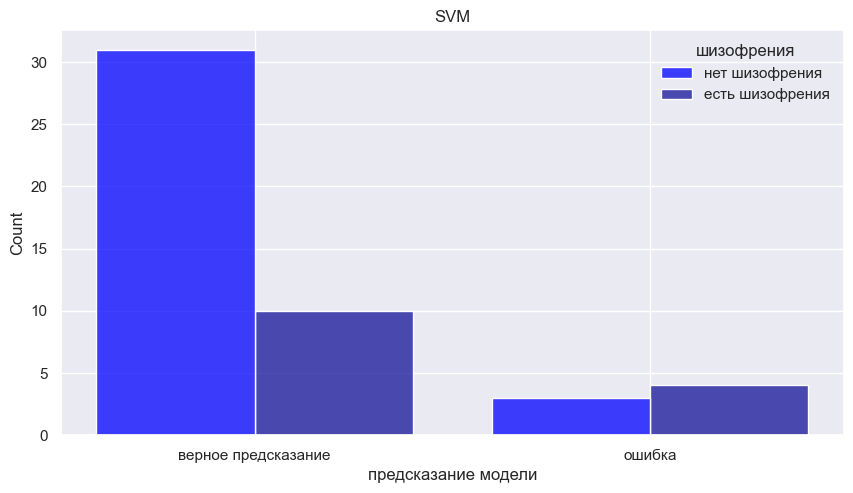

In [411]:
import seaborn as sns
from matplotlib import style
plt.figure(figsize=(9,5))
sns.set_palette(sns.dark_palette(color='blue', n_colors=3, reverse=True))
fig = sns.histplot(data=df, x="предсказание модели", hue="шизофрения", multiple="dodge", shrink=.8)
plt.title('SVM')
plt.show()